In [10]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_df = pd.read_csv("data/clinicaltrial_data.csv")
mouse_df = pd.read_csv("data/mouse_drug_data.csv")

# Combine the data into a single dataset
MCTData = pd.merge(mouse_df, clinical_df, on ="Mouse ID")

# Display the data table for preview

MCTData

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = MCTData.groupby(["Drug", "Timepoint"]).mean() ["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_response = pd.DataFrame(mean_tumor).reset_index()
# Preview DataFrame
tumor_response

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_grouped = MCTData.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error_grouped).reset_index()
# Preview DataFrame
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
re_mean = pd.pivot_table(MCTData,index=['Timepoint'],values=['Tumor Volume (mm3)'],columns=['Drug'])

re_mean.columns = re_mean.columns.droplevel(0)
re_mean
# Preview that Reformatting worked
re_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


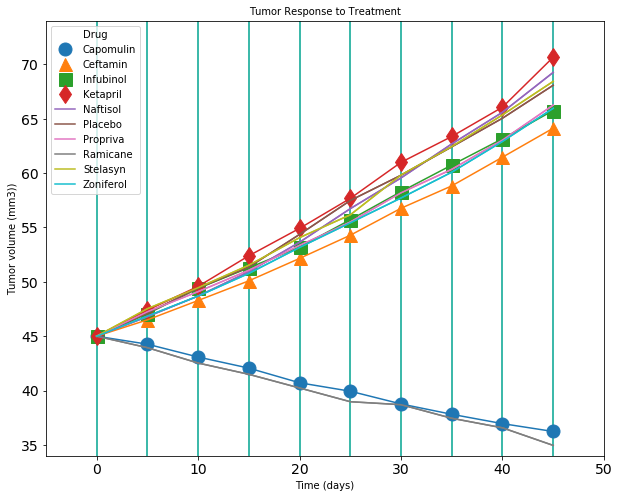

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate the Plot (with Error Bars)
ax = re_mean.plot(figsize=(10,8), yerr = re_mean, legend = False)

ax.set_prop_cycle(None)
#plot the markers
re_mean.plot(figsize=(10,8), style=["o", "^", "s", "d"], markersize=13, ax = ax)

plt.title("Tumor Response to Treatment").set_size(10)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(34, 74)

plt.show()
# Save the Figure
plt.savefig("../Images/tumor_response.png")


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [123]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = pd.DataFrame(MCTData.groupby(['Drug', 'Timepoint']).mean() ['Metastatic Sites'])
# Convert to DataFrame

# Preview DataFrame
met_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [125]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met = pd.DataFrame(MCTData.groupby(['Drug', 'Timepoint']).sem() ['Metastatic Sites'])
# Convert to DataFrame

# Preview DataFrame
SE_met.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [168]:
# Minor Data Munging to Re-Format the Data Frames
drugtable2 = pd.pivot_table(MCTData,index=['Timepoint'],values=['Metastatic Sites'],columns=['Drug'])

# Preview that Reformatting worked
drugtable2.columns = drugtable2.columns.droplevel(0)
drugtable2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [172]:
stderrgrouped = MCTData.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
stderrgrouped_df = pd.DataFrame(stderrgrouped).reset_index()
stderrgrouped_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


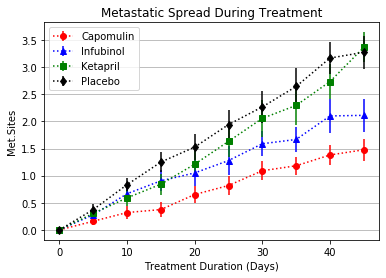

In [174]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")
ax.set_title("Metastatic Spread During Treatment")

drugs =  ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]
x_axis = [row for row in drugtable2.index]

stdErrPvt = stderrgrouped_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

i = 0

for drug in drugs:
    y_axis = drugtable2[drug]
    ax.errorbar(x_axis, y_axis, stdErrPvt[drug], linestyle=":", fmt=marker[i], color=color[i], label=drug)
    i = i+1
    
plt.legend()
ax.yaxis.grid()
plt.savefig("../Images/MetastaticSpread.png")
    
#reset color cycle so that the marker colors match

#plot the markers

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [176]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecountgrouped = MCTData.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mousecount_df = pd.DataFrame(mousecountgrouped).reset_index()

# Preview DataFrame
mousecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [178]:
# Minor Data Munging to Re-Format the Data Frames
mousetable = pd.pivot_table(mousecount_df,index=['Timepoint'],values=['Mouse ID'],columns=['Drug'])

# Preview the Data Frame
mousetable.columns = mousetable.columns.droplevel(0)
mousetable.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


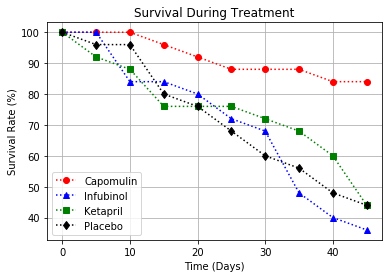

In [179]:
# Generate the Plot (Accounting for percentages)
Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]

x_axis = [row for row in mousetable.index]

fig, ax = plt.subplots()

i = 0

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
             
for drug in drugs:
    ax.plot(stderr_x_axis, (100 * mousetable[drug])/mousetable[drug][0], marker=marker[i], linestyle=":", label=drug, color=color[i])
    i = i+1
    
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("../Images/SurvivalRates.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
PercentChanges = {}
for drug in re_mean.columns:
    begin = re_mean[drug][0]
    end = re_mean[drug][45]
    change = round(((end - begin)/ begin) * 100,2)
    PercentChanges[drug] = change
# Display the data to confirm
PercentChanges

{'Capomulin': -19.48,
 'Ceftamin': 42.52,
 'Infubinol': 46.12,
 'Ketapril': 57.03,
 'Naftisol': 53.92,
 'Placebo': 51.3,
 'Propriva': 47.24,
 'Ramicane': -22.32,
 'Stelasyn': 52.09,
 'Zoniferol': 46.58}

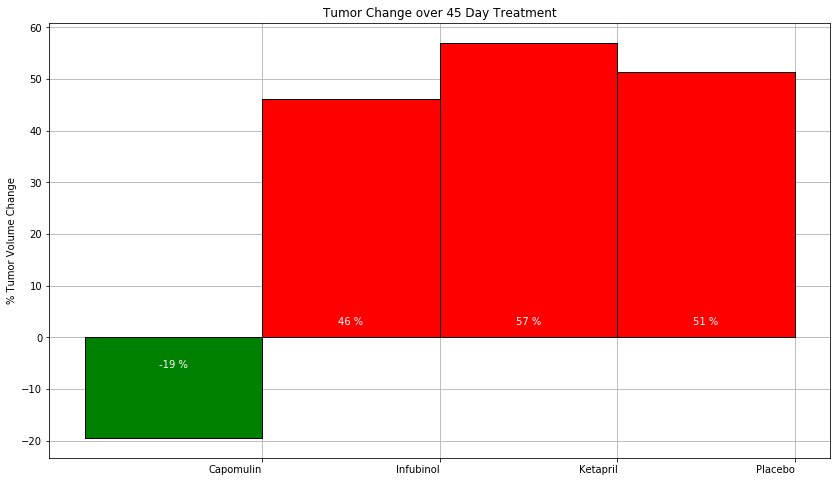

In [28]:
# Store all Relevant Percent Changes into a Tuple
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
ChangesToChart =  (PercentChanges[drugs[0]], PercentChanges[drugs[1]], PercentChanges[drugs[2]], PercentChanges[drugs[3]])
DecreasingDrugs = [drug for drug in ChangesToChart if drug < 0]
IncreasingDrugs = [drug for drug in ChangesToChart if drug >= 0]

# Splice the data between passing and failing drugs
y_pos = np.arange(len(ChangesToChart))
y_pos_pass = 0
y_pos_fail = np.arange(1, len(IncreasingDrugs) + 1)

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(14,8))

# Use functions to label the percentages of changes
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(y_pos, drugs, ha='right')


# Call functions to implement the function calls
PassingRectangles = plt.bar(y_pos_pass, DecreasingDrugs, align="edge", width=-1, color="green", linewidth="1", edgecolor="black")
FailingRectangles = plt.bar(y_pos_fail, IncreasingDrugs, align="edge", width=-1, color="red", linewidth="1", edgecolor="black")

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        
        if height >= 0:
            label_position = y_height * 0.025
        elif height < 0:
            label_position = -(y_height * 0.075)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                f'{int(height)} %',
                ha='center', va='bottom', color="white")

autolabel(PassingRectangles, ax)
autolabel(FailingRectangles, ax)
ax.grid()
ax.set_axisbelow(True)
# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)